In [1]:
# 构造测试数据集，2个特征，10个样本，2分类
import numpy as np

sample_num = 10
feature_num = 2

np.random.seed(0)
data = np.random.randn(sample_num, feature_num)
np.random.seed(0)
label = np.random.randint(0, 2, sample_num)

In [2]:
# 进行模型训练
import xgboost as xgb

train_data = xgb.DMatrix(data, label=label)
params = {'max_depth': 3}
bst = xgb.train(params, train_data, num_boost_round=1)

In [3]:
# 分别调用不同的特征重要性计算参数，看看结果
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

weight:  {'f0': 1, 'f1': 2}
gain:  {'f0': 0.265151441, 'f1': 0.375000015}
cover:  {'f0': 10.0, 'f1': 4.0}
total_gain:  {'f0': 0.265151441, 'f1': 0.75000003}
total_cover:  {'f0': 10.0, 'f1': 8.0}


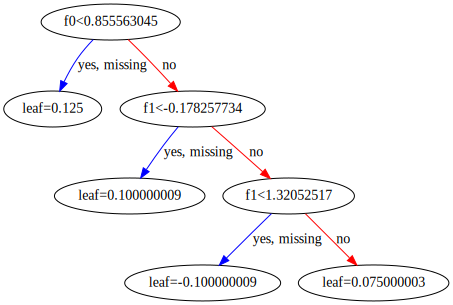

In [4]:
# 对照着图来看看
xgb.to_graphviz(bst, num_trees=0)




1. weight: {‘f0’: 1, ‘f1’: 2}在所有树中，某特征被用来分裂节点的次数，在本例中，可见分裂第1个节点时用到f0，分裂第2，3个节点时用到f1，所以weight_f0 = 1, weight_f1 = 2。
2. total_cover: {‘f0’: 10.0, ‘f1’: 8.0}
第1个节点，f0被用来对所有10个样例进行分裂，之后的节点中f0没再被用到，所以f0的total_cover为10.0，此时f0 >= 0.855563045的样例有5个，落入右子树；
第2个节点，f1被用来对上面落入右子树的5个样例进行分裂，其中f1 >= -0.178257734的样例有3个，落入右子树；
第3个节点，f1被用来对上面落入右子树的3个样例进行分裂。
总结起来，f0在第1个节点分裂了10个样例，所以total_cover_f0 = 10，f1在第2、3个节点分别用于分裂5、3个样例，所以total_cover_f1 = 5 + 3 = 8。total_cover表示在所有树中，某特征在每次分裂节点时处理(覆盖)的所有样例的数量。
3. cover: {‘f0’: 10.0, ‘f1’: 4.0}
cover = total_cover / weight，在本例中，cover_f0 = 10 / 1，cover_f1 = 8 / 2 = 4.
4. total_gain: {‘f0’: 0.265151441, ‘f1’: 0.75000003}
在所有树中，某特征在每次分裂节点时带来的总增益，如果用熵或基尼不纯衡量分裂前后的信息量分别为i0和i1，则增益为(i0 - i1)。
5. gain: {‘f0’: 0.265151441, ‘f1’: 0.375000015}
gain = total_gain / weight，在本例中，gain_f0 = 0.265151441 / 1，gain_f1 = 75000003 / 2 = 375000015.
在平时的使用中，多用total_gain来对特征重要性进行排序。


